In [205]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat
from LinReg import LinReg

# 計算 g factor
$$ g_F = \frac{hf}{\mu_B B} $$
uncertainty:
$$ u_g = g_F\sqrt{(u_B/B)^2+(u_f/f)^2} $$

In [206]:
h = 6.62607015E-34
i = ufloat(0.200,0.003)
mu = 4*np.pi*1e-7 # 真空磁導率
mu_B = 9.2740100783e-24 # 波爾磁子
N = 125
R = ufloat(0.2406,0.0003)
print('B=', b := (4/5)**(3/2)* mu * N * i / R)

i_v = ufloat(0.045, 0.003)
R_v = ufloat(0.1530, 0.0003)
print('Bv=', bv := (4/5)**(3/2) * mu * 100 * i_v / R_v)

uf = 3

B= (9.34+/-0.14)e-05
Bv= (2.64+/-0.18)e-05


In [207]:
def get_g_from_f(f1,f2):
    f1 = ufloat(f1,uf)
    f2 = ufloat(f2,uf)
    print('f=',f := (f1+f2)/2*1e3)
    print('g=',g := h*f/mu_B/b)

In [208]:
print("高高")
f1, f2 = 1152, 360
get_g_from_f(f1,f2)
print("高低")
f1, f2 = 951, 478
get_g_from_f(f1,f2)

高高
f= (7.560+/-0.021)e+05
g= 0.578+/-0.009
高低
f= (7.145+/-0.021)e+05
g= 0.546+/-0.008


# 地磁

In [209]:
def get_bh(f1,f2, g):
    f1 = ufloat(f1,uf)
    f2 = ufloat(f2,uf)
    f = (f1-f2)/2 * 1000
    print("B_h=", bh := h * f / mu_B / g)
    return bh

bh85 = get_bh(765, 405, 1/3)
bh87 = get_bh(1152, 604, 1/2)
bh = (bh85+bh87)/2
bv, bh
print('B_earth=', B_earth := (bh*bh+bv*bv)**0.5)

B_h= (3.86+/-0.05)e-05
B_h= (3.915+/-0.030)e-05
B_earth= (4.70+/-0.10)e-05


# Breit-Rabi

# 截面積

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


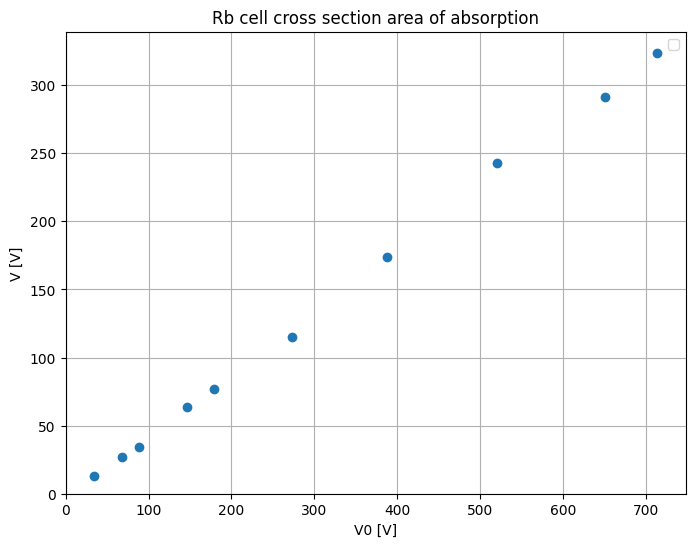

In [210]:
rho = 1.60575E+17

linreg = LinReg('Rb_cell_cross_section_area_of_absorption.csv')
fig, ax = plt.subplots(1,1, figsize=(8,6))
linreg.plot(ax)